In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
    def __init__(self):
        self.epoch = []
        self.train_loss = []
        self.weights = None

    def fit(self, X, y, lr=0.001, epochs=100, batch_size=1):
        
        # Weight init
        self.weights = np.random.rand(X.shape[-1] + 1).reshape(-1,1)

        for epoch in range(epochs):

            for batch in range(len(X)//batch_size):   
               # Batch the data
               x_batch = X[batch*batch_size:(batch+1)*batch_size]
               y_batch = y[batch*batch_size:(batch+1)*batch_size]

               # Process batch
               y_batch = y_batch.reshape(-1,1)
               new_x_batch = np.zeros((x_batch.shape[0], x_batch.shape[1]+1)) + 1
               new_x_batch[:,1:] = x_batch

               # Predict batch
               y_pred = self.predict(new_x_batch)

               # Update
               for nw in range(len(self.weights)):
                   dx = ((y_pred - y_batch) * new_x_batch[:,nw].reshape(-1,1)).mean() 
                   self.weights[nw] -= lr * dx
               
            self.epoch.append(epoch)  

            # Process data
            new_y = y.reshape(-1,1)
            new_X = np.zeros((X.shape[0], X.shape[1]+1)) + 1
            new_X[:,1:] = X

            self.train_loss.append(self.get_loss(new_X, new_y))

    def get_loss(self, X, y):
        y_predicted = self.predict(X)
        loss = ((y_predicted - y)**2).mean()
        return loss

    def predict(self, X):
        try:
            return X @ self.weights
        except:
            # Process data
            new_X = np.zeros((X.shape[0], X.shape[1]+1)) + 1
            new_X[:,1:] = X
            return new_X @ self.weights
                
    def evaluate(self, X, y):
        # Process data
        new_X = np.zeros((X.shape[0], X.shape[1]+1)) + 1
        new_X[:,1:] = X

        y_predicted = self.predict(new_X)
        loss = ((y_predicted - y)**2).mean()
        return loss
        
    def plot_curve(self):
        # self.epoch and self.train_loss may be helpful here. 
        plt.plot(self.train_loss)
        plt.yscale('log')
        plt.title('Training loss')
        plt.xlabel('Epochs')
        plt.ylabel('MSE Loss')
        plt.show()

# Load data & data pre-processing

In [3]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

In [4]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [7]:
# You may do the labelEncoder here
# You may try different label encoding for training your own model
#### For multiple features, please use the following settings.####
# sex.female -> 0
# sex.male -> 1

# smoker.no -> 0
# smoker.yes -> 1

# region.northeast -> 0
# region.northwest -> 1
# region.southeast -> 2
# region.southwest -> 3
##################################################################

def process(df):
    # ONE 
    # df = pd.get_dummies(df)

    # TWO 
    df['region'] = df.region.astype('category') #= pd.Categorical()
    df['sex'] = df.sex.astype('category')
    df['smoker'] = df.smoker.astype('category')
    df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].apply(lambda x: x.cat.codes) #.select_dtypes(['category']).columns
    
    return df

df_train = process(df_train)
df_val   = process(df_val)
df_test  = process(df_test)

# Single feature (using bmi)

In [8]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [9]:
# You may convert data to NumPy here 

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

In [10]:
batch_size = x_train.shape[0]

# Tune the parameters
# Refer to slide page 9
lr = 0.002 
epochs = 110000 

np.random.seed(2023)
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)


In [11]:
print("Intercepts: ", linear_reg.weights[0])
print("Weights: ", linear_reg.weights[1])

Intercepts:  [1382.08676323]
Weights:  [380.14868938]


In [12]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  150013100.16474593


In [13]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  152654366.78169277


In [14]:
test_pred = linear_reg.predict(x_test)

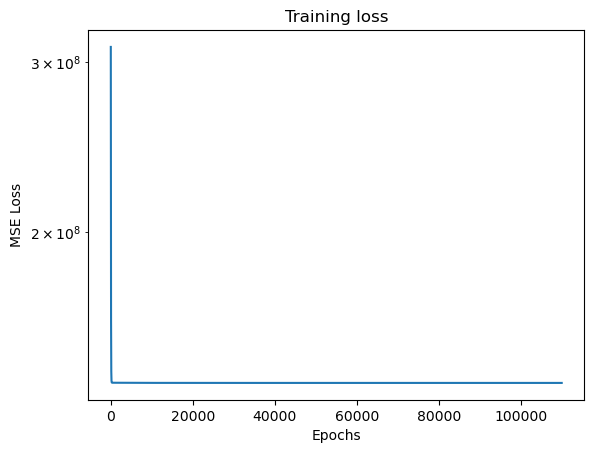

In [15]:
linear_reg.plot_curve()

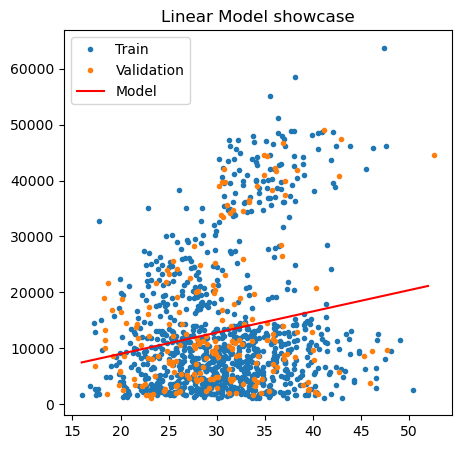

In [16]:
# Use matplotlib to plot the predicted line with the training and validation samples

fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.plot(x_train, y_train, '.', label='Train')
ax.plot(x_val, y_val, '.', label='Validation')
_x = np.arange(np.min(x_train), np.max(x_val))
_y = linear_reg.weights[1]*_x + linear_reg.weights[0]
ax.plot(_x, _y, 'r', label='Model')
ax.set_title('Linear Model showcase')

ax.legend(); plt.show()


# Multiple features

In [17]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [18]:
# You may convert data to NumPy here 
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

In [19]:
batch_size = x_train.shape[0]

# Tune the parameters
# Refer to slide page 10
lr = 7e-4       
epochs = 650000 

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

In [20]:
print("Intercepts: ", linear_reg.weights[0])
print("Weights: \n", linear_reg.weights[1:])

Intercepts:  [-11857.0282974]
Weights: 
 [[  259.85072835]
 [ -383.54711728]
 [  333.33185838]
 [  442.55699935]
 [24032.21979136]
 [ -416.01494405]]


In [21]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  254877566.17408064


In [22]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  261046250.56485775


In [23]:
test_pred = linear_reg.predict(x_test)

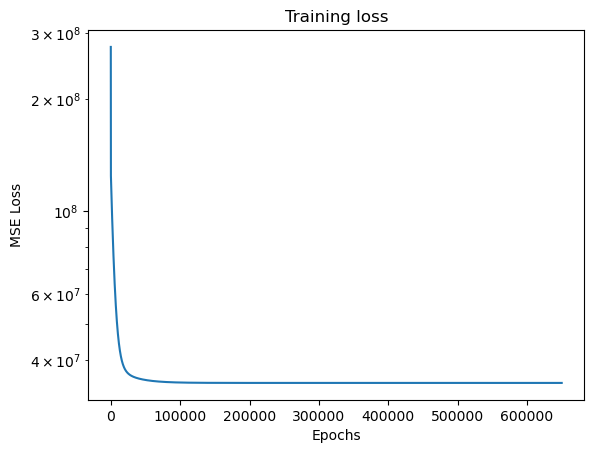

In [24]:
linear_reg.plot_curve()

# Train your own model and predict for testing data.

In [25]:
# DATA
x_train = df_train#.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val#.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [26]:
# You may convert data to NumPy here 

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

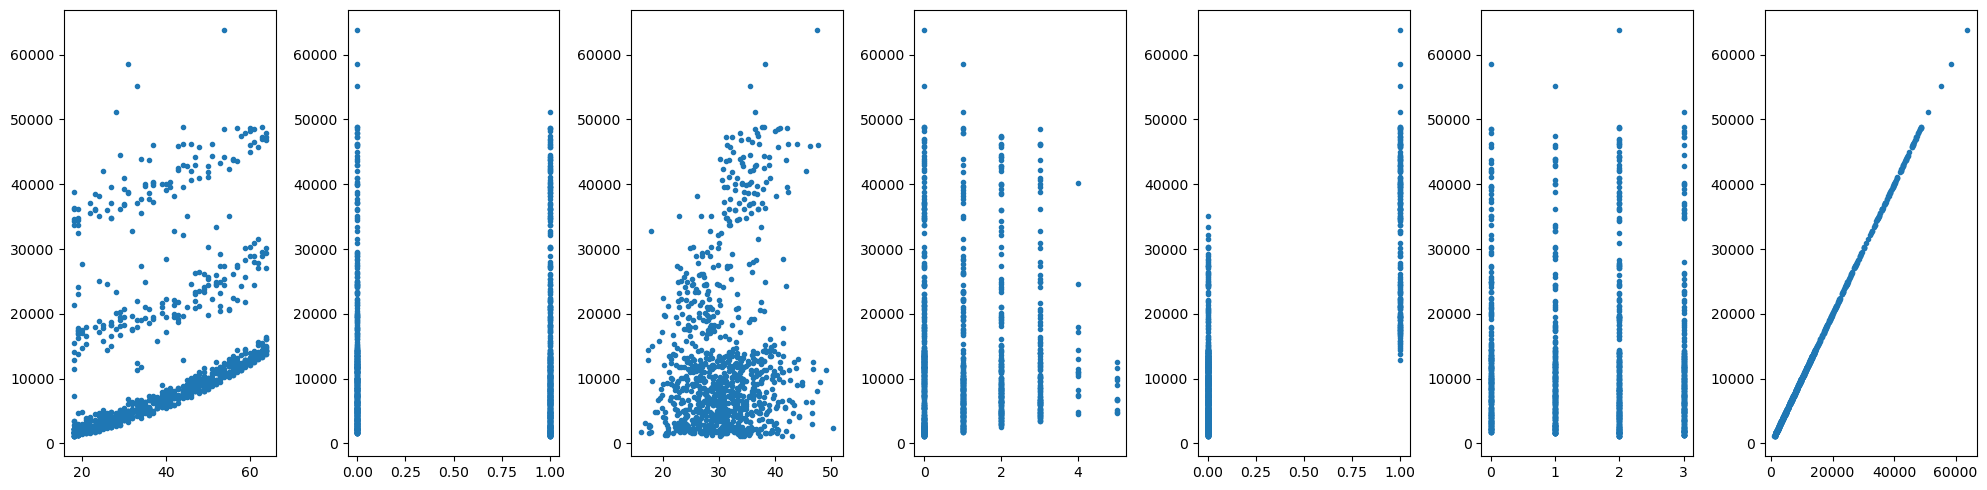

In [27]:
fig, ax = plt.subplots(1,x_train.shape[1],figsize=(20,5))

for n in range(x_train.shape[1]):
    ax[n].plot(x_train[:,n], y_train, '.')

plt.tight_layout()

/tmp/ipykernel_43972/50070385.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+list(df_train.columns), rotation=40)
/tmp/ipykernel_43972/50070385.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+list(df_train.columns))


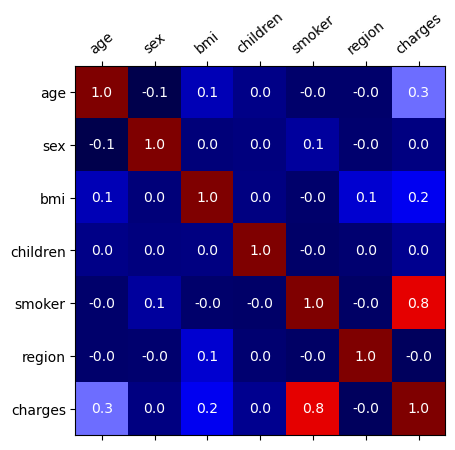

In [28]:
# Multicollinearity

N = x_train.shape[1]
A = np.zeros((N, N))

for n1 in range(N):
    for n2 in range(N):
        c = np.corrcoef(x_train[:,n1], x_train[:,n2])
        A[n1,n2] = c[0,1]

fig, ax = plt.subplots()
ax.matshow(A, cmap='seismic')
for (i, j), z in np.ndenumerate(A):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', c='w')
ax.set_xticklabels(['']+list(df_train.columns), rotation=40)
ax.set_yticklabels(['']+list(df_train.columns))
plt.show()

So we can observe that *age, bmi,* and *smoker* are highy correleted so it means that we will use those features as main ones.

In [29]:
# DATA
x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [30]:
x_train = x_train.drop(['children', 'region', 'sex'], axis=1)
x_val   = x_val.drop(['children', 'region', 'sex'], axis=1)
x_test   = x_test.drop(['children', 'region', 'sex'], axis=1)

In [31]:
# Convert data to NumPy here 
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

In [32]:
# x_test

In [33]:
# Compose polynomial features
def polynomial(X):
    X3 = (X[:,0]**2).reshape(-1,1)
    X4 = (X[:,0] * X[:,1]).reshape(-1,1)
    X5 = (X[:,1] * X[:,2]).reshape(-1,1)
    X6 = (X[:,1]**2).reshape(-1,1)
    X7 = (X[:,2] * X[:,0]).reshape(-1,1)
    X8 = (X[:,2]**2).reshape(-1,1)
    
    X = np.concatenate((X, X3,X4,X5,X6,X7,X8), -1)
    return X

x_train = polynomial(x_train)
x_val = polynomial(x_val)
x_test = polynomial(x_test)

In [34]:
x_train.shape

(938, 9)

In [35]:
np.random.seed(2023)
# lr = 7e-4 # works for 3 features to get down to 30k 
# epoch = 600000

lr = 5e-8
epoch = 4000000

linear_model = LinearRegression()
# linear_model.weights = np.load('weights.npy')

linear_model.fit(x_train, y_train, lr=lr, epochs=epoch, batch_size=x_train.shape[0])


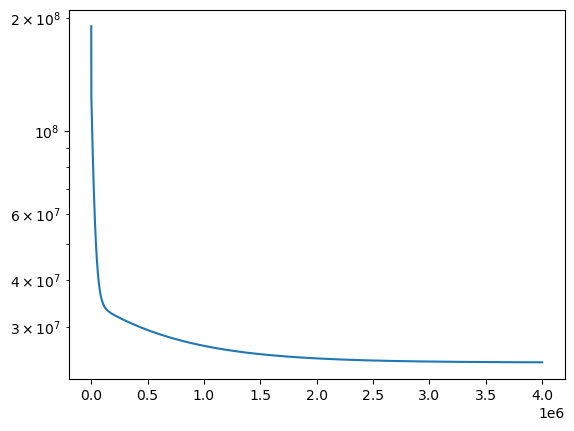

In [36]:
plt.plot(linear_model.train_loss)
plt.yscale('log')

Training loss 24.132414131901978
Validation loss 29.748207007298348


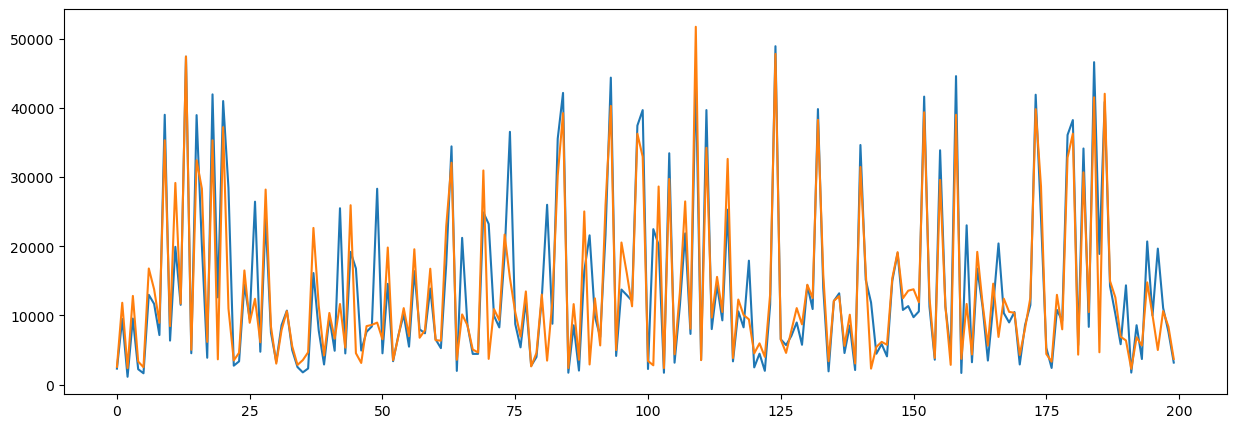

In [37]:
y_pred = linear_model.predict(x_train)
loss = ((y_train - y_pred[:,0])**2).mean()
print('Training loss', loss / 1e+6)


y_pred = linear_model.predict(x_val)
loss = ((y_val - y_pred[:,0])**2).mean()
print('Validation loss', loss / 1e+6)

plt.figure(figsize=(15,5))
plt.plot(y_val)
plt.plot(y_pred)
plt.show()

In [38]:
# Save weights
print(linear_model.weights)
np.save('weights', linear_model.weights)

[[-1.99399216e+00]
 [ 5.09763294e+00]
 [ 2.62074438e+01]
 [ 1.44630996e+00]
 [ 2.69579664e+00]
 [ 2.14544486e+00]
 [ 9.38202508e+02]
 [-1.50159927e-01]
 [-1.09484505e+02]
 [ 1.86464910e+00]]


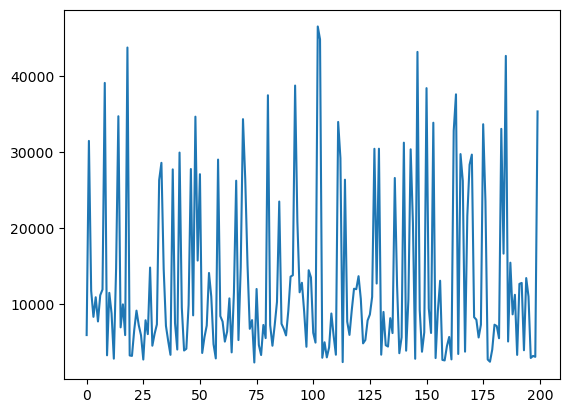

In [39]:
test_pred = linear_model.predict(x_test)
plt.plot(test_pred)

---

In [40]:
test_pred = linear_model.predict(x_test)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200, 1)

test_pred shape:  (200, 1)


# Output the csv file

In [41]:
df_test = pd.DataFrame(pd.read_csv("./regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("prediction.csv")